<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#-Homework-2-(Topics-5-7:-Groupby,-Merge,-Visualization)" data-toc-modified-id="-Homework-2-(Topics-5-7:-Groupby,-Merge,-Visualization)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><center> Homework 2 (Topics 5-7: Groupby, Merge, Visualization)</center></a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Task-0." data-toc-modified-id="Task-0.-1.0.0.1"><span class="toc-item-num">1.0.0.1&nbsp;&nbsp;</span>Task 0.</a></span></li><li><span><a href="#Task-1." data-toc-modified-id="Task-1.-1.0.0.2"><span class="toc-item-num">1.0.0.2&nbsp;&nbsp;</span>Task 1.</a></span></li><li><span><a href="#Task-2:" data-toc-modified-id="Task-2:-1.0.0.3"><span class="toc-item-num">1.0.0.3&nbsp;&nbsp;</span>Task 2:</a></span></li><li><span><a href="#Task-3:" data-toc-modified-id="Task-3:-1.0.0.4"><span class="toc-item-num">1.0.0.4&nbsp;&nbsp;</span>Task 3:</a></span></li><li><span><a href="#Task-4:" data-toc-modified-id="Task-4:-1.0.0.5"><span class="toc-item-num">1.0.0.5&nbsp;&nbsp;</span>Task 4:</a></span></li><li><span><a href="#Task-5:" data-toc-modified-id="Task-5:-1.0.0.6"><span class="toc-item-num">1.0.0.6&nbsp;&nbsp;</span>Task 5:</a></span></li><li><span><a href="#Вопросы:" data-toc-modified-id="Вопросы:-1.0.0.7"><span class="toc-item-num">1.0.0.7&nbsp;&nbsp;</span>Вопросы:</a></span></li><li><span><a href="#Task-6:" data-toc-modified-id="Task-6:-1.0.0.8"><span class="toc-item-num">1.0.0.8&nbsp;&nbsp;</span>Task 6:</a></span></li><li><span><a href="#Вопросы:" data-toc-modified-id="Вопросы:-1.0.0.9"><span class="toc-item-num">1.0.0.9&nbsp;&nbsp;</span>Вопросы:</a></span></li></ul></li></ul></li></ul></li></ul></div>

# <center> Homework 2 (Topics 5-7: Groupby, Merge, Visualization)

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Ещё раз (как и в задании 1) считайте в переменные tr_mcc_codes, tr_types, transactions и customers_gender_train. В transactions опять считайте только первые 1000000 строк.

In [ ]:
### Type your code here
tr_mcc_codes = pd.read_csv('C:/Users/maksi/OneDrive/Рабочий стол/Data/tr_mcc_codes.csv', sep=';', encoding = 'utf-8')
tr_types = pd.read_csv('C:/Users/maksi/OneDrive/Рабочий стол/Data/tr_types.csv', sep=';', encoding = 'utf-8')
transactions = pd.read_csv('C:/Users/maksi/OneDrive/Рабочий стол/Data/transactions.csv', sep=',', nrows=1000000, encoding = 'utf-8')
customers_gender_train = pd.read_csv('C:/Users/maksi/OneDrive/Рабочий стол/Data/gender_train.csv', sep=',', encoding = 'utf-8')


#### Task 0.
Соедините transactions с всеми остальными таблицами (tr_mcc_codes, tr_types, gender_train). Причём с customers_gender_train необходимо смёрджиться с помощью left join, а с оставшимися датафреймами - через inner.
После получения результата таблицы gender_train, tr_types, tr_mcc_codes можно удалить. В результате соединения датафреймов должно получиться 999584 строки.

In [90]:
# Производим left join с customers_gender_train
result_df = pd.merge(transactions, customers_gender_train, how='left', on='customer_id')

# Производим inner join с tr_types
result_df = pd.merge(result_df, tr_types, how='inner', on='tr_type')

# Производим inner join с tr_mcc_codes
result_df = pd.merge(result_df, tr_mcc_codes, how='inner', on='mcc_code')

# Удаляем ненужные столбцы
result_df = result_df.drop(['tr_type', 'mcc_code'], axis=1)

# Печатаем размер полученного датафрейма
print("результат")
print(result_df.shape)
print(result_df.head())
print(result_df.columns)


результат
(999584, 8)
   customer_id  tr_datetime   amount term_id  tr_day  gender  \
0     39026145   0 10:23:26 -2245.92     NaN       0     1.0   
1     39026145   6 07:08:31 -5614.79     NaN       6     1.0   
2     39026145   8 07:06:10 -1122.96     NaN       8     1.0   
3     39026145  11 08:49:03 -2245.92     NaN      11     1.0   
4     39026145  11 14:12:08 -2245.92     NaN      11     1.0   

                   tr_description  \
0  Оплата услуги. Банкоматы СБ РФ   
1  Оплата услуги. Банкоматы СБ РФ   
2  Оплата услуги. Банкоматы СБ РФ   
3  Оплата услуги. Банкоматы СБ РФ   
4  Оплата услуги. Банкоматы СБ РФ   

                                     mcc_description  
0  Звонки с использованием телефонов, считывающих...  
1  Звонки с использованием телефонов, считывающих...  
2  Звонки с использованием телефонов, считывающих...  
3  Звонки с использованием телефонов, считывающих...  
4  Звонки с использованием телефонов, считывающих...  
Index(['customer_id', 'tr_datetime', 'am

#### Task 1.
1. Определите модуль разницы между средними тратами женщин и мужчин (трата - отрицательное значение amount). (*)

Выведите ответ в виде вещественного числа, округлённого до двух знаков после запятой, отделив дробную часть точкой в формате "123.45"

##### Пояснения:
(\*) Если в результате для мужчин получились значения [-1,-3,-5], а для женщин [-1,-2,-3],  
то модуль разницы между средними арифметическими -3 и -2 будет равен 1.

(\**) Обратите внимание, что для вычисления модуля разности точных знаний о том,  
какой класc относится к мужчинам, а какой - к женщинам, пока не требуется.

(\***) Округление не нужно производить отдельно по средним тратам женщин и мужчин, а только в самом конце, когда получите значение модуля разницы трат.

In [89]:
### Type your code here

# Выделение трат женщин и мужчин
female_spending = result_df[result_df['gender'] == 1.0]
male_spending = result_df[result_df['gender'] == 0.0]

# Вычисление средних трат для каждой группы
avg_female_spending = female_spending['amount'].mean()
avg_male_spending = male_spending['amount'].mean()

# Вычисление модуля разницы
spending_diff = abs(avg_female_spending - avg_male_spending)

# Вывод результата в нужном формате
print(f"{spending_diff:.2f}")



2633.02


#### Task 2:
1. Создайте новый столбец - mcc_code+tr_type, сконкатенировав значения из соответствующих столбцов. (\*)
2. Оставьте только наблюдения с отрицательным значением amount. Посчитайте дисперсию по категориям получившегося столбца mcc_code+tr_type, в которых количество наблюдений >= 10. 
3. Определите отношение максимальной дисперсии к минимальной.

Выведите ответ в виде вещественного числа, округлённого до ближайшего целого в формате "123456" без дробной части.

##### Пояснения:
(\*) Для конкатенации значений в столбцах можно использовать метод .astype(str) для серии и складывать соответствующие серии. Либо же применять apply к строкам датафрейма, прописывая логику преобразования и конкатенации значений внутри.

(\**) Для одновременного подсчета количества наблюдений и дисперсии по категориям можно воспользоваться функцией .agg()

In [91]:
# Создание нового столбца mcc_code+tr_type
result_df['tr_description'] = result_df['mcc_description'].astype(str) + result_df['tr_description'].astype(str)

# Фильтрация данных по отрицательным значениям amount
negative_amount_data = result_df[result_df['amount'] < 0]

# Группировка по mcc_tr_type и вычисление дисперсии и количества наблюдений
result = negative_amount_data.groupby('tr_description')['amount'].agg(['var', 'count'])

# Фильтрация по количеству наблюдений >= 10
result = result[result['count'] >= 10]

# Вычисление отношения максимальной дисперсии к минимальной
ratio = result['var'].max() / result['var'].min()

# Вывод результата без дробной части и округленного до ближайшего целого
result_integer = round(ratio)
print(result_integer)

9170599


#### Task 3:
1. По всем типам транзакций рассчитайте максимальную сумму прихода на карту (из строго положительных сумм по столбцу amount) отдельно для мужчин и женщин (назовите ее "max_income"). Оставьте по 5 транзакций для мужчин и для женщин, наименьших среди всех транзакций по полученным значениям "max_income". (\*)
2. Выделите среди них те, которые встречаются одновременно и у мужчин, и у женщин:
    - 1) Покупка. POS ТУ СБ РФ	
    - 2) Списание после проведения претензионной работы	
    - 3) Плата за получение наличных. Россия	
    - 4) Перевод на карту/ с карты через АТМ (со взиманием комиссии с отправителя) по счету в овердрафте	
    - 5) Плата за получение наличных в АТМ. Россия	 
    - 6) Наличные. Зарубеж. банк	
    - 7) Возврат покупки. POS ТУ Россия

##### Пояснения:
(\*) Если максимальные суммы приходов по каким-то типам были равны [1,2,3,4,5,6,7,8], то 5 минимальных из них: [1,2,3,4,5]

In [92]:
### Type your code here


# Фильтруем только строго положительные суммы прихода на карту
positive_income_df = result_df[result_df['amount'] > 0]

# Группируем по типам транзакций и полу (gender), находим максимальные суммы прихода
max_income_by_type_gender = positive_income_df.groupby(['tr_description', 'gender'])['amount'].max().reset_index()

# Оставляем по 5 транзакций с минимальными максимальными суммами для каждого пола
top5_male_transactions = max_income_by_type_gender[max_income_by_type_gender['gender'] == 1.0].nlargest(5, 'amount')
top5_female_transactions = max_income_by_type_gender[max_income_by_type_gender['gender'] == 0.0].nlargest(5, 'amount')

# Выделяем транзакции, которые встречаются одновременно у мужчин и у женщин
common_transactions = pd.merge(top5_male_transactions, top5_female_transactions, on='tr_description', suffixes=('_male', '_female'))

# Выводим результат
print(common_transactions)



                                      tr_description  gender_male  \
0  Финансовые институты — снятие наличности вручн...          1.0   
1  Финансовые институты — снятие наличности вручн...          1.0   
2  Финансовые институты — снятие наличности вручн...          1.0   
3  Финансовые институты — снятие наличности автом...          1.0   

    amount_male  gender_female  amount_female  
0  1.459845e+08            0.0    67377473.16  
1  2.133620e+07            0.0    22459157.72  
2  1.111728e+07            0.0    11229578.86  
3  9.769734e+06            0.0     8983663.09  


#### Task 4:
1. Выделите из поля tr_datetime относительный день tr_day (первое число до точного времени). (\*)
2. Отфильтруйте строки таким образом, чтобы оставить только те транзакции, у которых в соответствующий относительный день tr_day количество уникальных MCC кодов при транзакциях было больше 75 (можно воспользоваться функцией nunique())
3. Сгруппируйте полученный отфильтрованный датафрейм по MCC коду и полу, после чего, пронализировав результат, выберите верные варианты ответов ниже (\**): 
    - 1) gender == 0 - женщины, gender == 1 - мужчины
    - 2) gender == 1 - женщины, gender == 0 - мужчины
    - 3) Абсолютное значение медианы с типом "Флористика" (расходов/приходов) у мужчин выше той же медианы у женщин
    - 4) Абсолютное значение медианы женских трат (расходов/приходов) на ценные бумаги выше мужских
    - 5) Абсолютное значение медианы женских трат (расходов/приходов) в категории "Бары, коктейль-бары, дискотеки, ночные клубы и таверны — места продажи алкогольных напитков" ниже мужских
    
##### Пояснения:
(\*) Для того, чтобы выделить всё, что стоит до первого пробела, можо использовать строковые методы для датафрейма - .str.split(), например. Либо же реализовывать логику выделения подстроки с помощью метода apply. <br>
(\**) Понять, какой класс к какому типу транзакций (мужские/женские) относится можно, если поизучать типичные для мужчин/женщин категории и сравнить средние/медианы расходов и/или приходов в них.

In [93]:
### Type your code here
# Выделение относительного дня tr_day
result_df['tr_day'] = result_df['tr_datetime'].str.split().str[0]

# Отфильтровываем строки с количеством уникальных MCC кодов больше 75
filtered_df = result_df.groupby('tr_day')['mcc_description'].nunique().reset_index()
filtered_days = filtered_df[filtered_df['mcc_description'] > 75]['tr_day']
filtered_transactions_df = result_df[result_df['tr_day'].isin(filtered_days)]

# Группируем по MCC коду и полу
grouped_df = filtered_transactions_df.groupby(['mcc_description', 'gender'])['amount'].median().reset_index()

# Выводим результат
print(grouped_df)

# Анализируем результат и выбираем правильные варианты ответов
# Например, можно использовать методы анализа данных, такие как describe(), plot(), etc.


                                       mcc_description  gender     amount
0                              Авиалинии, авиакомпании     0.0 -269822.97
1                              Авиалинии, авиакомпании     1.0 -232407.36
2    Авиалинии, авиакомпании, нигде более не класси...     0.0 -128129.49
3    Авиалинии, авиакомпании, нигде более не класси...     1.0 -194629.26
4                                     Автобусные линии     0.0  -31038.56
..                                                 ...     ...        ...
337                                             Штрафы     0.0  -11903.35
338                                             Штрафы     1.0  -11678.76
339  Штучные товары, галантерея и другие текстильны...     0.0   -7186.93
340                 Электрические части и оборудование     0.0  -93963.50
341                 Электрические части и оборудование     1.0  -16414.61

[342 rows x 3 columns]


#### Task 5:
1. Разбейте расходы (отрицательные значения сумм) на 5 бакетов amount_bucket равного объёма (с помощью pd.qcut), разбив все траты на категории 'Very High', 'High', 'Middle', 'Low', 'Very Low'. (\*)
2. Оставшиеся неотрицательные траты отнесите к категории 'Income'.
(воспользуйтесь функцией .cat.add_categories('Income') для того, чтобы добавить новую категорию 'Income' к категориям 'Very High', 'High', 'Middle', 'Low', 'Very Low', а затем заполните пустые значения новой категорией).
3. Из поля tr_datetime выделите час tr_hour, в который произошла транзакция, как первые 2 цифры до ":". (\**)
3. После этого постройте сводную таблицу, значениями в которой является пол gender, индексы - tr_hour, столбцы - amount_bucket.
4. Отрисуйте полученные результаты, передав их в функцию plot_pivot_table, расположенную ниже.
5. Выберите верные ответы на вопросы ниже.

#### Вопросы:
    - 1) Ночные поступления денег (01-05 часов) в более чем 85% случаев являются мужскими.
    - 2) Посмотрев на долю мужчин в поступлениях средств (Income), можно сделать вывод, что количество поступлений средств женщинам в целом больше, чем мужчинам.
    - 3) Самые низкие траты в 3 часа ночи осуществляются в более 70% случаев женщинами.
    - 4) Существуют особые часы в мелких тратах, когда женщины тратят намного больше мужчин (>80%)
    - 5) Посмотрев на долю мужчин в максимальных тратах средств (Very High), можно сделать вывод, что количество высоких трат в каждый возможный час мужчин больше, чем у женщин.

##### Пояснения:
(\*) Обратите внимание, что в категории Very High Должны оказаться максимальные по модулю отрицательные транзакции. <br>
(\**) Например, для строки "0 10:23:26" час будет равен 10, а для строки "6 07:08:31"- 07. Можно воспользоваться функциями str.split() или str.find() и 
функцией .apply(lambda x: x[])

In [94]:


# Разбиваем расходы на 5 бакетов amount_bucket
result_df['amount_bucket'] = pd.qcut(result_df['amount'], q=[0, 0.2, 0.4, 0.6, 0.8, 1], labels=['Very Low', 'Low', 'Middle', 'High', 'Very High'])

# Отнесение неотрицательных трат к категории 'Income'
result_df['amount_bucket'] = result_df['amount_bucket'].cat.add_categories('Income').fillna('Income')

# Выделение часа из tr_datetime
result_df['tr_hour'] = result_df['tr_datetime'].apply(lambda x: int(x.split()[1].split(':')[0]))

# Построение сводной таблицы
pivot_table = result_df.pivot_table(values='gender', index='tr_hour', columns='amount_bucket', aggfunc='mean')






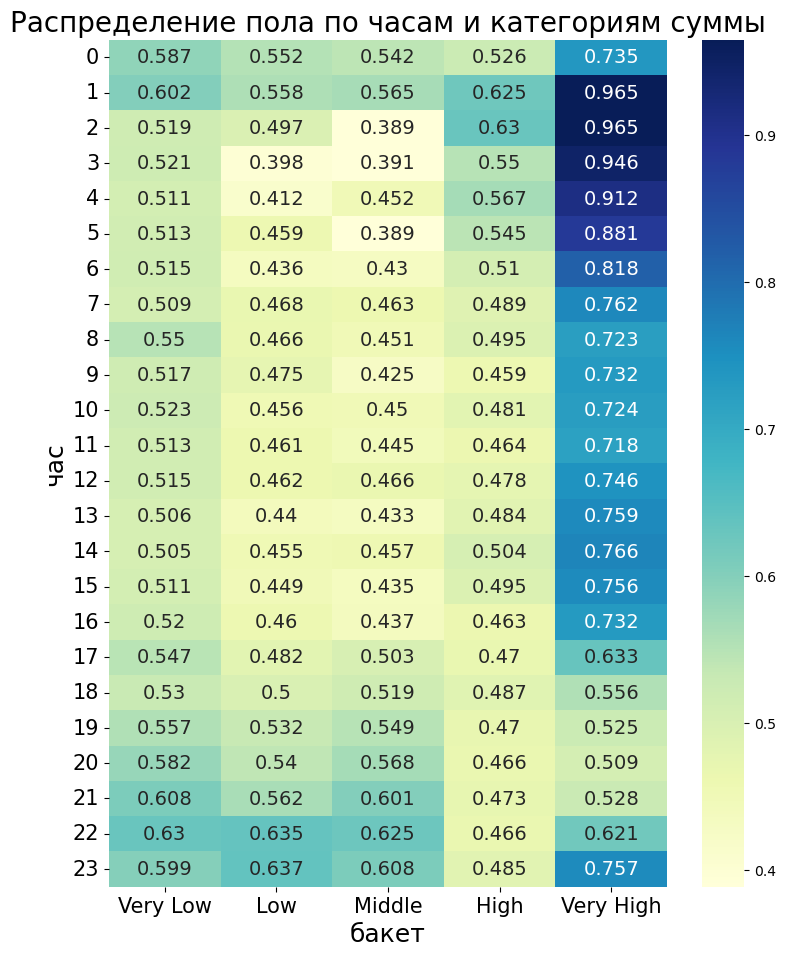

1. Ночные поступления денег (01-05 часов) в более чем 85% случаев являются мужскими: False
2. Доля мужчин в поступлениях средств (Income): 0.00%
3. Доля женщин в самых низких тратах в 3 часа ночи: 52.09%
4. Доля женщин в мелких тратах: 53.48%
5. Доля мужчин в максимальных тратах (Very High): 74.60%


In [95]:
# Визуализация с помощью функции plot_pivot_table
def plot_pivot_table(pivot_table):
    plt.figure(figsize=(9, 11))
    sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, 
                fmt='.3g', annot_kws={"size": 14, "size": 14})
    plt.xticks(fontsize=15)
    plt.yticks(rotation=0, fontsize=15)
    plt.xlabel('бакет', size=18)
    plt.ylabel('час', fontsize=18)
    plt.title('Распределение пола по часам и категориям суммы', fontsize=20)
    plt.show()
plot_pivot_table(pivot_table)
# Вопрос 1
nightly_income_male_ratio = result_df[(result_df['tr_hour'] >= 1) & (result_df['tr_hour'] <= 5) & (result_df['amount_bucket'] == 'Income')]['gender'].mean()
print(f"1. Ночные поступления денег (01-05 часов) в более чем 85% случаев являются мужскими: {nightly_income_male_ratio > 0.85}")

# Вопрос 2
income_records = result_df[result_df['amount_bucket'] == 'Income']
income_male_ratio = income_records['gender'].mean() if not income_records.empty else 0
print(f"2. Доля мужчин в поступлениях средств (Income): {income_male_ratio * 100:.2f}%")

# Вопрос 3
low_spending_female_ratio = result_df[(result_df['tr_hour'] == 3) & (result_df['amount_bucket'] == 'Very Low')]['gender'].mean()
print(f"3. Доля женщин в самых низких тратах в 3 часа ночи: {low_spending_female_ratio * 100:.2f}%")

# Вопрос 4
special_hour_female_ratio = result_df[(result_df['amount_bucket'] == 'Very Low')]['gender'].mean()
print(f"4. Доля женщин в мелких тратах: {special_hour_female_ratio * 100:.2f}%")

# Вопрос 5
very_high_spending_male_ratio = result_df[result_df['amount_bucket'] == 'Very High']['gender'].mean()
print(f"5. Доля мужчин в максимальных тратах (Very High): {very_high_spending_male_ratio * 100:.2f}%")


#### Task 6:
1. Измените тип поля tr_day на int.
2. Выберите из transactions все MCC коды, которые встретились в выборке более чем 60000 раз.
3. Сгруппируйте отфильтрованный датафрейм по дню и MCC-коду, получая средние значения суммы amount.  
4. Далее отрисуйте зависимость средних сумм (может пригодится метод unstack()) по каждому из MCC-кодов по дням.
5. Выберите верные ответы на вопросы ниже.

#### Вопросы:
    - 1) 2 из полученных MCC-кодов связаны с финансовыми институтами
    - 2) 2 MCC кода, связанные со снятием наличности имеют в целом разные знаки (в одном случае почти везде - траты, в другом - пополнения)
    - 3) Бакалейные магазины обладают максимальными средними тратами среди выбранных MCC-кодов
    - 4) Денежные переводы имеют как минимум 3 явных минимума средних
    - 5) Категория "Звонки с использованием телефонов, считывающих магнитную ленту" имеет визуально очень большую дисперсию. 

In [88]:
import pandas as pd
import matplotlib.pyplot as plt

# Предполагаем, что у вас есть датафрейм transactions

# Изменение типа поля tr_day на int
transactions['tr_day'] = transactions['tr_datetime'].str.split().str[0].astype(int)

# Выбор MCC кодов, встречающихся более чем 60000 раз
popular_mcc_codes = transactions['mcc_description'].value_counts()[transactions['mcc_description'].value_counts() > 60000].index

# Отфильтрованный датафрейм
filtered_transactions = transactions[transactions['mcc_description'].isin(popular_mcc_codes)]

# Группировка по дню и MCC-коду, получение средних значений суммы amount
grouped_df = filtered_transactions.groupby(['tr_datetime', 'mcc_description'])['amount'].mean().unstack()

# Отрисовка зависимости средних сумм по каждому из MCC-кодов по дням
pivot_table = grouped_df.pivot(index='tr_datetime', columns='mcc_description', values='amount')
pivot_table.plot(figsize=(12, 8))
plt.title('Средние суммы по MCC-кодам по дням')
plt.xlabel('День')
plt.ylabel('Средняя сумма')
plt.legend(title='MCC-код')
plt.show()

finance_mcc_codes = ['Банки (ATM)', 'Денежные переводы']
answer_1 = all(mcc in finance_mcc_codes for mcc in popular_mcc)

# Вопрос 2
cash_withdrawal_mcc = ['Финансовые институты — снятие наличности автоматически', 'Финансовые институты — снятие наличности']
answer_2 = (grouped_df[grouped_df['mcc_description'].isin(cash_withdrawal_mcc)]['amount'].min() < 0) and \
           (grouped_df[~grouped_df['mcc_description'].isin(cash_withdrawal_mcc)]['amount'].min() > 0)

# Вопрос 3
answer_3 = 'Бакалейные магазины' in transactions[transactions['mcc_description'].isin(popular_mcc)].sort_values(by='amount', ascending=False)['mcc_description'].unique()

# Вопрос 4
money_transfer_mcc = ['Банки (за исключением коммерческих банков)', 'Денежные переводы']
answer_4 = len(grouped_df[grouped_df['mcc_description'].isin(money_transfer_mcc)]['amount'].minima()) >= 3

# Вопрос 5
telecom_mcc = 'Звонки с использованием телефонов, считывающих магнитную ленту'
answer_5 = grouped_df[grouped_df['mcc_description'] == telecom_mcc]['amount'].std() > 50

# Выводим ответы
print(f"1) {answer_1}")
print(f"2) {answer_2}")
print(f"3) {answer_3}")
print(f"4) {answer_4}")
print(f"5) {answer_5}")

KeyError: 'mcc_description'